# Выявление  закономерностей, определяющих  успешность компьютерных  игр для интернет-магазина "Стримчик"


Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В ходе проекта нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

План работы:
1. Изучим общую информацию файла с данными
2. Заменим названия столюцов, приведем в соотвтествие типы данных, обработаем пропуски, создадим новые столбцы при необходимости.
3. Посмтотрим как менялись продажи по платформам, посмотрим сколько игр выпускалось в разные годы, построим график ящик с усами по глобальным продажам игр в разбивке по платформам, посмотрмм как влияют на продажи внутри одной платформы отзывы пользователей, посмотрмм на общее распределение игр по жанрам.
4. Составим портрет пользователя каждого региона.
5. Проверим гипотезы.

## Открытие файла с данными и изучение общей информацию о данных

### Открытие файла

импортируем необходимы для работы библиотеки и откроем файл

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [ ]:
try:
  # смотрим есть ли локально файл
  df = pd.read_csv('/datasets/games.csv', sep=',')
except:
  # если же его нет
  df = pd.read_csv('/datasets/games.csv', sep=',')

### Изучение общей информации

In [ ]:
# посмотрим размер таблицы
df.shape

(16715, 11)

In [ ]:
# выведем первые 5 строк
pd.set_option('display.max_columns', None)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# выведем последние 5 строк
pd.set_option('display.max_columns', None)
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [ ]:
# посмотрим типы данных у столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*** Вывод : ***
В полях name (16713), Year_of_Release (16446), Genre (16713), Critic_Score (8137), User_Score (10014), Rating (9949)  пропуски. Всего записей 16715.  В имени и жанре по два пропуска их наверно можно удалить.
Все имена лучше привести к нижнему регистру. Поля Critic_Score, Year_of_Release можно сделать тип int, так как это рейтинги от 0 до 100 и год выхода игры.
Так же нужно проверить данные на явные дубликаты и обработать пропуски.

## Подготовка данных для анализа

### Заменим названия столбцов (приведите к нижнему регистру)

In [ ]:
# приведем название полей  в правильный формат
# Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
df.columns = df.columns.str.lower().str.replace(" ", "_")

### Преобразуем данные в нужные типы

In [ ]:
# В Полях User_Score, Critic_Score, Year_of_Release заменим  тип int
df['critic_score'] = np.floor(pd.to_numeric(df['critic_score'], errors='coerce')).astype('Int64')
df['year_of_release'] = np.floor(pd.to_numeric(df['year_of_release'], errors='coerce')).astype('Int64')

### Обработаем пропуски

В полях name (16713), Year_of_Release (16446), Genre (16713), Critic_Score (8137), User_Score (10014), Rating (9949)  пропуски. Всего записей 16715.



In [ ]:
#посмотрим процент пропусков в колонках
df.isna().mean().sort_values(ascending=False) * 100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

В полях user_score и critica_score пропусков больше 50%! В поле rating 40! В поле year_of_release 1,6,

В name и genre по 0.01. Думаю в этих полях строки с пропусками можно удалить, т.к. их не много и без названия и жанра мы не сможем их анализировать. Это обезличенные записи.

In [ ]:
# посмотрим строки где название игры отсутствует
df[df['name'].isnull()]
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Это одни и теже 2 записи и точно можно удалить

In [ ]:
# удаляем записи, где отсутствует название игры и жанр
df[df['name'].isnull()]
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)

In [ ]:
# удаляем записи, где отсутствует год
df[df['year_of_release'].isnull()]
df.dropna(subset=['year_of_release'], inplace=True)

In [ ]:
# посмотрим уникальные значения в поле user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим здесь занчение tbd, видимо это рейтинг не определен и можно его заменить на Nan. После этого можно заменить тип данных на float.

In [ ]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

### Сделаем проверку на явные и неявные дубликаты

In [ ]:
# посмотрим явные дубликаты
df.duplicated().sum()

0

In [ ]:
# Проверим таблицу df на дубликаты имен и названий городов
df['name'].unique()
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов нет

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales.

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

*** Вывод : ***
В результате обработки данных мы нашли большое количество пропусков.
В полях user_score, critica_score, rating пропусков очень много, но заменить их нечем, возможно это новые фильмы, которые не успели оценить критики пользователи и нет пока рейтинга. Оставим их как есть.
Записи с пропусками в name и genre мы просто удалили, т.к.они не информативны.
Пропуски в поле год выпуска заменили на 0.
В поле user_score обнаружили аббревиатуру 'tbd', значит рейтинг не определен, заменили ее на Nan


## Исследовательский анализ

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [ ]:
# посмотрим максимальный год выпуска
df['year_of_release'].max()

2016

In [ ]:
# посмотрим минимальный год выпуска
df[df['year_of_release'] > 1950]['year_of_release'].min()

1980

максимальный год выпуска 2016, минимальный  0 (мы сами меняли пропуски на 0). Если ограничить год 1950 (раньше вряд ли что то выпускали), то минимальный получается 1980. Тоесть игры в выборке с 1980 по 2016. Построим гисторгамму по годам

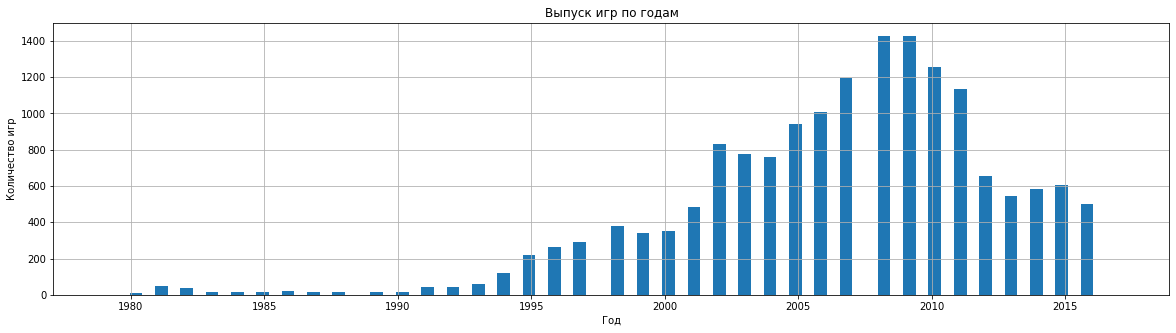

In [ ]:
plt.figure(figsize=(20, 5))
df['year_of_release'].hist(bins = 80, range=(1979, 2017))
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

на гистограмме тоже видим, что игры начали выпускать с 1980 года, но по 1993 выпуск совсем не большой.

In [ ]:
# посчитаем количество игр по годам
year_count = df.pivot_table(index='year_of_release', aggfunc={'name':'count'})
year_count.columns = ['count_games']
year_count

,count_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


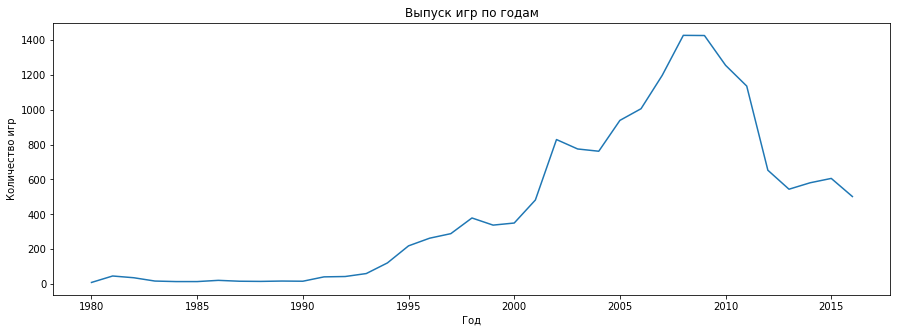

In [ ]:
# построим график с использованием lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(data=year_count, x="year_of_release", y="count_games");
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

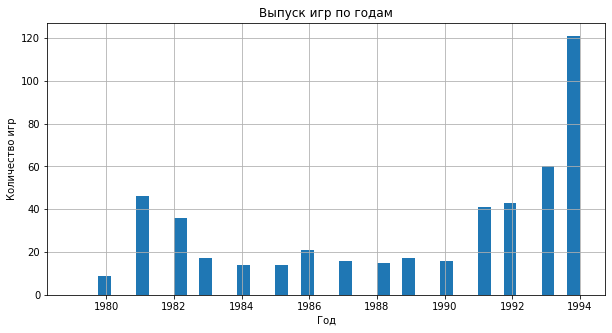

In [ ]:
plt.figure(figsize=(10, 5))
df['year_of_release'].hist(bins = 40, range=(1979, 1994))
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Только в 1994 году до 120 игр. Скорей всего данные за этот период не так важны и их можно отбросить. Построим еще отдельную гисторгамму за важный период с 2005 по 2016

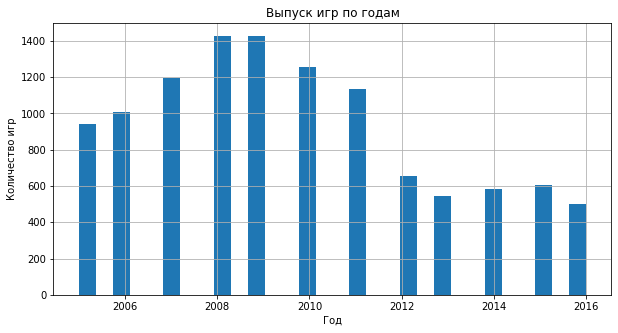

In [ ]:
plt.figure(figsize=(10, 5))
df['year_of_release'].hist(bins = 30, range=(2005, 2016))
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
#plt.grid(color='grey', axis='both', alpha=5)
plt.show()

Видим что произошел скачок в разработке игр после 1993 года, так продолжалось до 2009 года, после чего пошел спад и резкое падение в разработке в 2012 году.

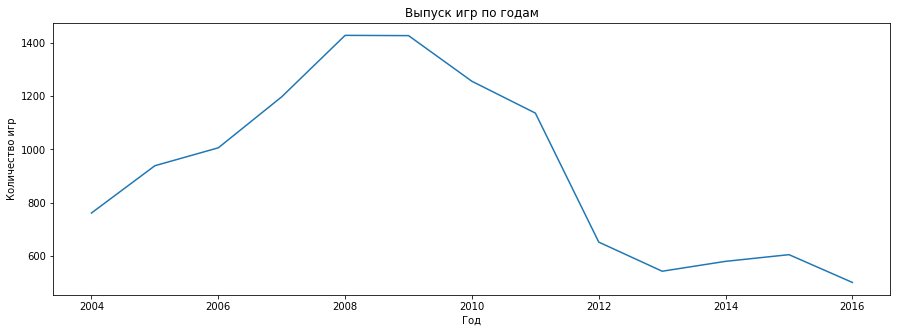

In [ ]:
year_count_2005 = year_count.query('year_of_release >= 2004')
# построим график с использованием lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(data=year_count_2005, x="year_of_release", y="count_games");
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Посмотрим сколько всего уникальных платформ в данных

In [ ]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Выберем платформы с наибольшими суммарными продажами

In [ ]:
# создадим своднуютаблицу  по виду платформы и суммарным продажам и отсортируем по убыванию
platform_top = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
platform_top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


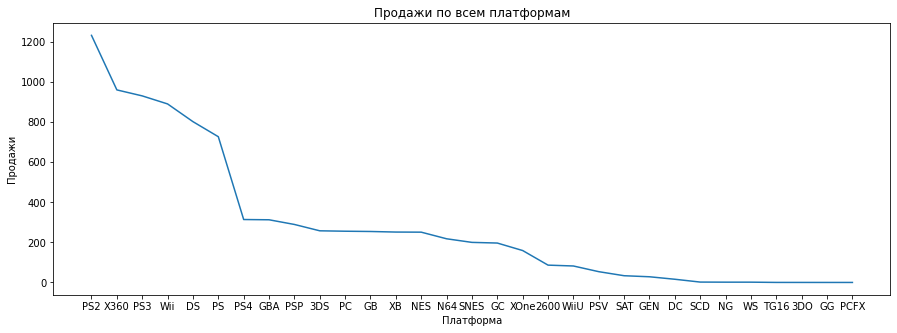

In [ ]:
# построим график с использованием lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(data=platform_top, x="platform", y="total_sales");
plt.title('Продажи по всем платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Выберем платформы с наибольшими суммарными продажами и построим для каждой платформы распределение по годам.

In [ ]:
platform_top_10 = platform_top.reset_index()
platform_top_10loc = platform_top_10.iloc[0:10]
platform_top_10 = platform_top_10loc['platform'].unique()
platform_top_10
platform_top_10loc

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


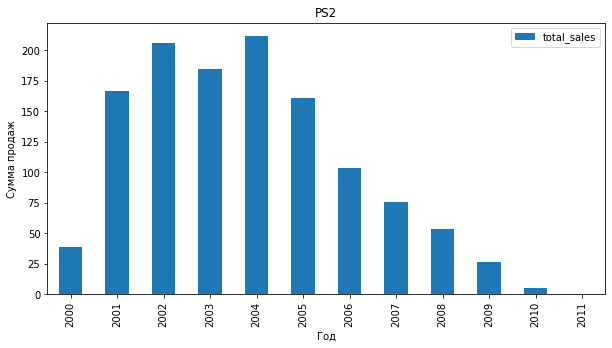

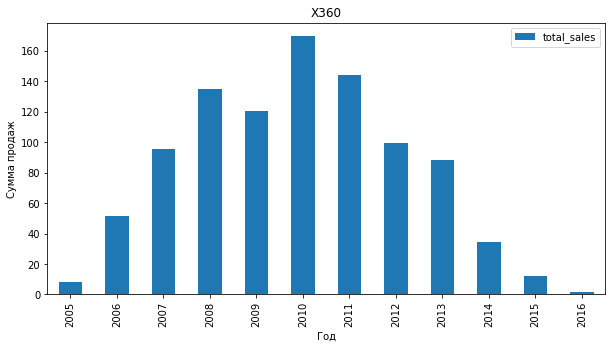

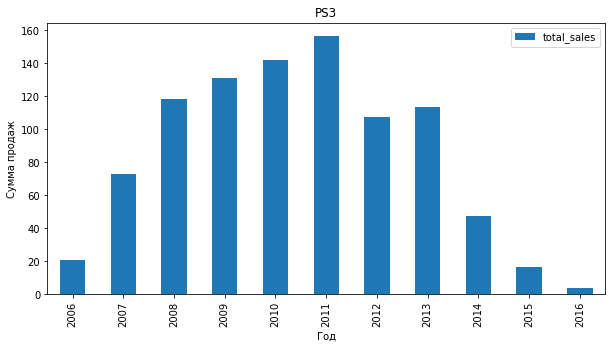

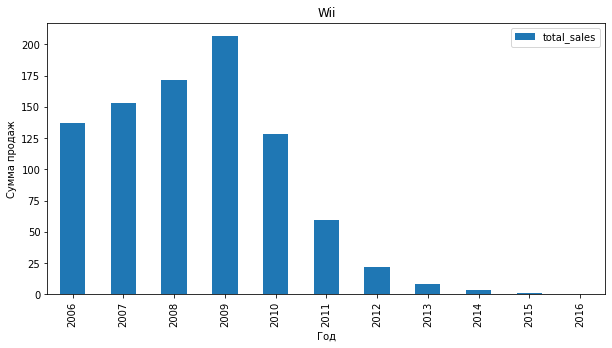

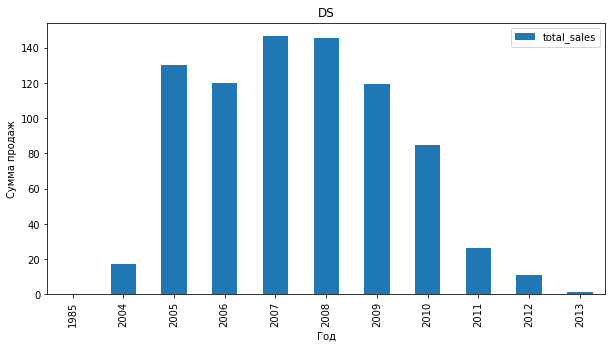

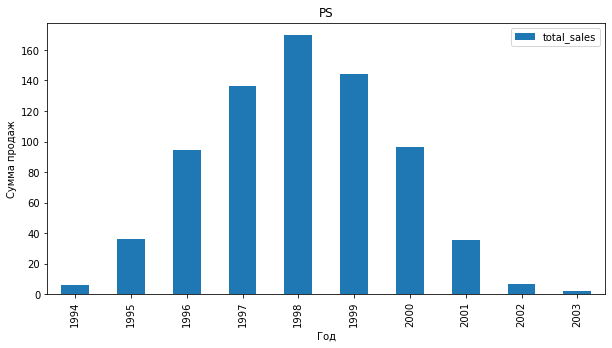

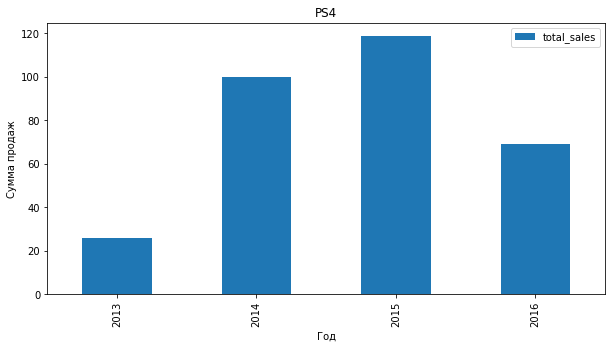

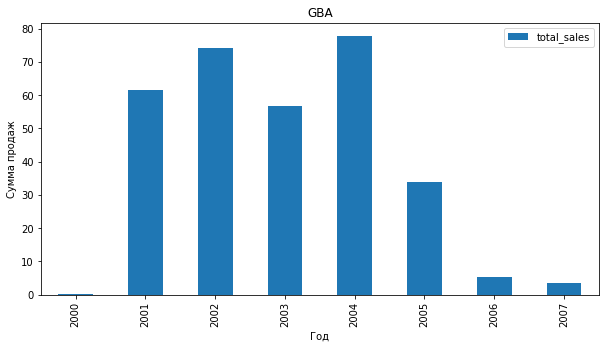

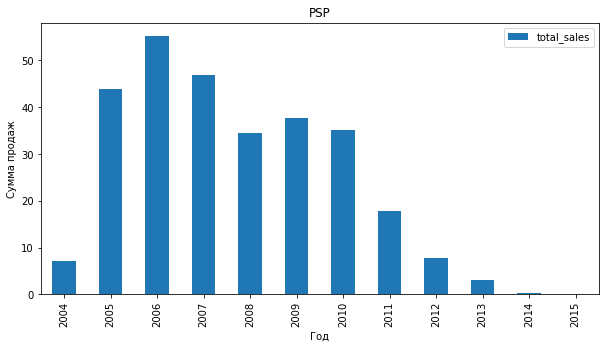

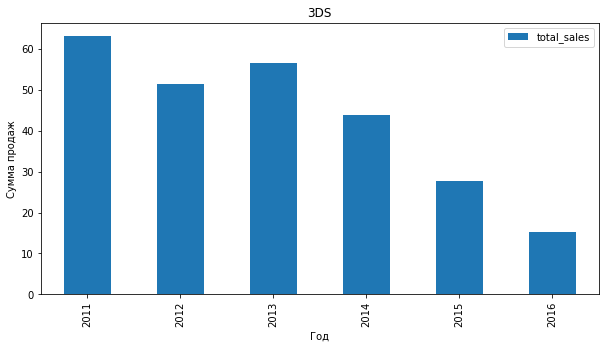

In [ ]:
for platform in platform_top_10:
    df[df['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(10,5))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Сумма продаж')

Проанализировав графики можно сделать вывод, что новые приставки появляются практически ежегодно, но больше всего их появилось в 2006 году.  Пик продаж приходит у многих на середину популярности, а потом снижается. У приставок DS, PS, GBA, PS2, Wii, PSP уже нет продаж в 2015 году, значит их можно исключить из анализа, срок их жизни около 7 лет прошел.  А вот продажи у PS4, X360, PS3, 3DS хоть и снижаюся, но есть и в 2015 и в 2016, их и нужно выбрать для анализа.

Чтобы найти продолжительность жизни платформы нужно найти те платформы, продажи которых уже равны нулю. А затем найти среднюю продолжительность жизни. Чтобы их найти нужно построить графики для всех платформ и выбрать те, у которых продажы 0

In [ ]:
# создадим список платформ, продажи которых 0 к 2016 году
platform_end = ['NES', 'GB', 'PS2', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']

# вычислим разность между годом окончания существования платформы и началом
platform_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_life.columns = ['beginnig', 'end']
platform_life['count_life'] = platform_life['end'] - platform_life['beginnig']

# отфильтруем полученную таблицу по списку platform_end
platform_life_filtred = (platform_life
                     .reset_index()
                     .query('platform in @platform_end')
                    )
platform_life_filtred

,platform,beginnig,end,count_life
0,2600,1980,1989,9
1,3DO,1994,1995,1
3,DC,1998,2008,10
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0
10,N64,1996,2002,6
11,NES,1983,1994,11


Средний срок жизни посчитаем медианой

In [ ]:
life_median = platform_life_filtred['count_life'].median()
life_median

6.0

Средняя продолжительность жизни составляет 6 лет

Для нашего анализа данные за весь предоставленный период не нужны, а нужны только те, которые отражают тенденции последних лет. Возьмем данные после 2013 года и только для тех, платформ, продажи по которым не скатились в 0. Это платформы X360, PS3, PS4, 3DS

### Возьмем данные за соответствующий актуальный период. Актуальный период определили с 2013 по 2016 годы для платформ  X360, PS3, PS4, 3DS. Эти данные помогут построить прогноз на 2017 год.

Для анализа по результатам предидущих пунктов выбрали период с 2013 по 2016 год, этот период и возьмем для прогнозов на 2017. и только по платформам, которые не устарели X360, PS3, PS4, 3DS

In [ ]:
actual_period = df.query('year_of_release >= 2013')

Попробуем построить графики для 10 самых удачных по продажам платформ за актуальный период с 20012 по 2017г.

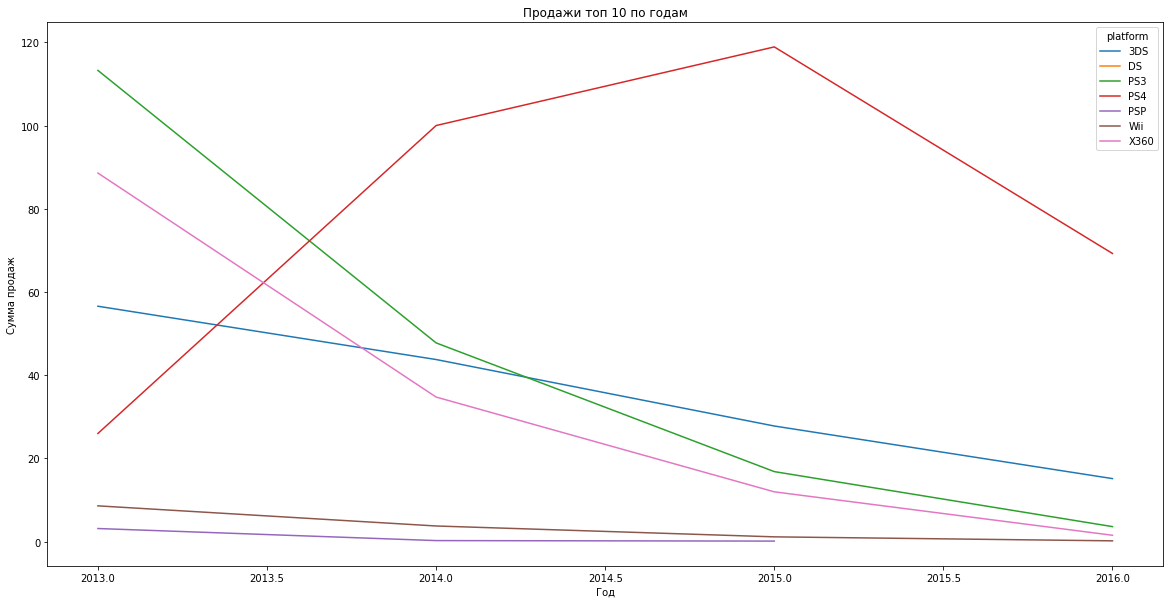

In [ ]:
actual_period.query('platform in @platform_top_10').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(20, 10))
plt.title('Продажи топ 10 по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show();

Делаем вывод что сейчас продается и будут продаваться хоть и с падением платформы PS4, Wii, X360, PS3, 3DS   PS4 самая новая, поэтому у нее есть перспективы на продажу. У остальных графики к 2016 году идут вниз.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

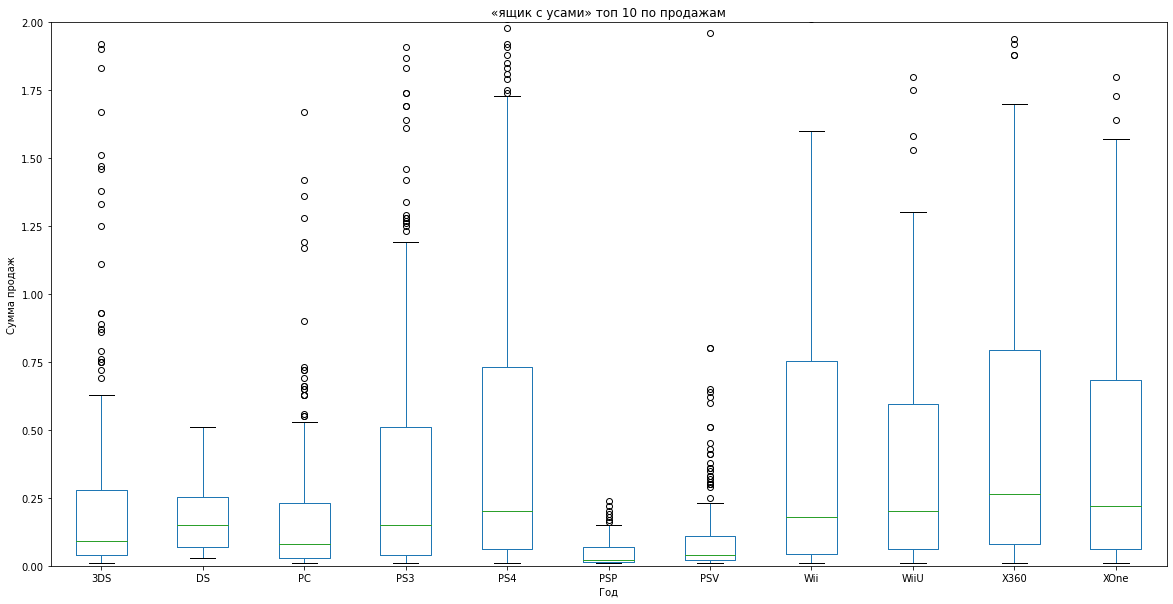

In [ ]:
# Построим график «ящик с усами»  в разбивке по платформам за актуальный период

actual_period.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize=(20, 10))
plt.title('«ящик с усами» топ 10 по продажам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show();

Здесь видим, что лидерами по продажам являюся PS4, X360, will, PS3, XOne. У PS3 и X360 на предыдущем графике продажи идут вниз, а XOne на прошлом графике вообще нет. Но здесь видно , что продажи идут хорошо, как у PS4 , довабим ее в рейтинг перспективных. В итоге платформы, у которых есть шансы на 2017 год: XOne, PS4, 3DS, PS3, X360, Wii.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

При выборе платформы, нужно учесть тот факт что у нас в данных большое количество пропусков по отзывам критиков и пользователей для новых платформ, или тех которые используются в 2016 году. Поэтому нужно выбрать популярную платформу до 2016 года. Напримр возьмем DS. Она была популярна 2005 - 2010 годы, пик был в 2007-2008.

Посчитаем корреляцию отзывов от продаж

In [ ]:
DS = df.query('platform == "DS"')
DS_cor = DS[['critic_score','user_score', 'total_sales']]
DS_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.653908,0.237546
user_score,0.653908,1.000000,0.130876
total_sales,0.237546,0.130876,1.000000


Построим диаграмму рассеяния и посмотрим совпадают ли отзывы пользователей и критиков. Здесь лучше подойдет scatter-plot

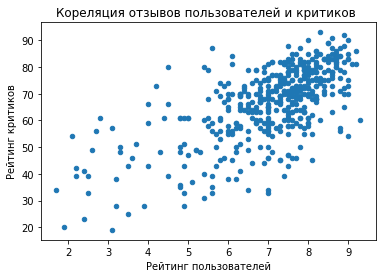

In [ ]:
DS.plot(x='user_score', y='critic_score', kind='scatter')
plt.title('Кореляция отзывов пользователей и критиков ')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Рейтинг критиков')
plt.show();

Делаем вывод, что оценки критиков и пользователей совпадают. По таблице можно сказать, что игровая аудитория прислушивается не только к критикам, но и к игрокам.

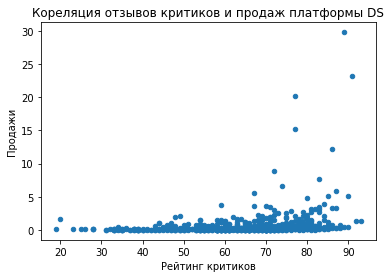

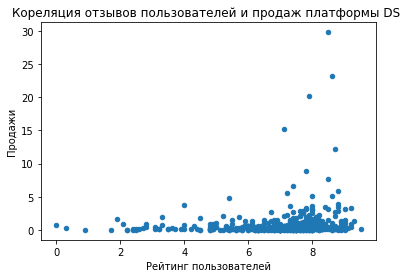

In [ ]:
DS.plot(y='total_sales', x='critic_score', kind='scatter')
plt.title('Кореляция отзывов критиков и продаж платформы DS')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show();

DS.plot(y='total_sales', x='user_score', kind='scatter')
plt.title('Кореляция отзывов пользователей и продаж платформы DS ')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show();

Исходя из графиков расеяния можно сказать, что объем продаж  для платформы DS не сильно коррелирует с отзывами критиков и пользователей. Небольшая корреляция наблюдается только при оценке критиков от 70, и пользователей от 7

### Соотнесем выводы с продажами игр на других платформах

Возмем для примера еще две платфоры PS4, PC

In [ ]:
PS4 = df.query('platform == "PS4"')
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [ ]:
PC = df.query('platform == "PC"')
PC_cor = PC[['critic_score','user_score', 'total_sales']]
PC_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.555199,0.257395
user_score,0.555199,1.000000,0.012905
total_sales,0.257395,0.012905,1.000000


Для PS4, PC можно сказать что продажи немного корелируют с оценкой критиков

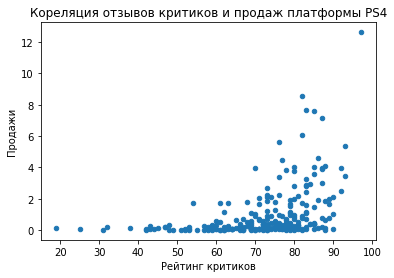

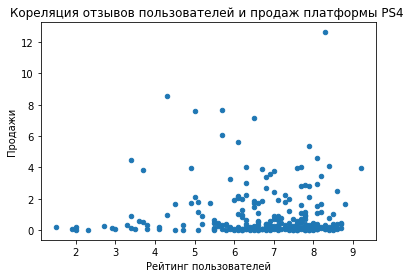

In [ ]:
PS4.plot(y='total_sales', x='critic_score', kind='scatter')
plt.title('Кореляция отзывов критиков и продаж платформы PS4')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show();

PS4.plot(y='total_sales', x='user_score', kind='scatter')
plt.title('Кореляция отзывов пользователей и продаж платформы PS4 ')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show();

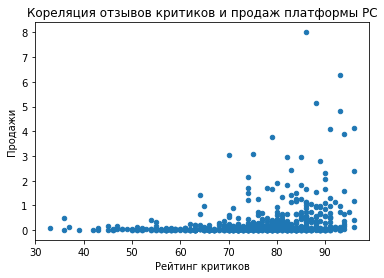

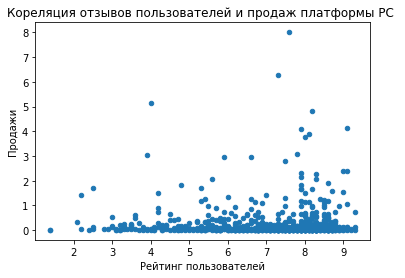

In [ ]:
PC.plot(y='total_sales', x='critic_score', kind='scatter')
plt.title('Кореляция отзывов критиков и продаж платформы PC')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show();

PC.plot(y='total_sales', x='user_score', kind='scatter')
plt.title('Кореляция отзывов пользователей и продаж платформы PC ')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show();

На графике между точками возможно провести прямую, около которой будут расположено большинство точек, значит кореляция между продажами и оценкой критиков есть, между продажами и оценкой пользователей тоже есть, но слабее, чем с оценкой критиков. В обоих случаях кореляция прямая или положительная.

### Посмотрим на общее распределение игр по жанрам.

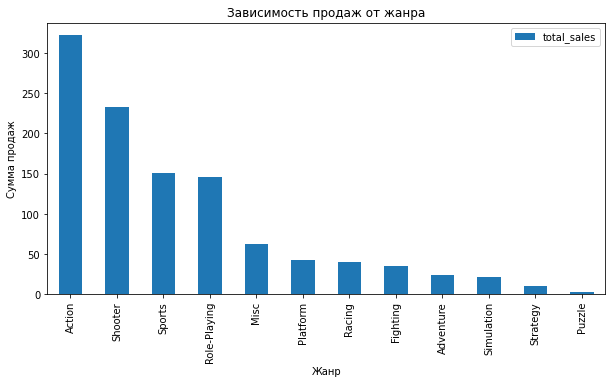

In [ ]:
actual_period.pivot_table(index='genre', aggfunc={'total_sales':sum}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(10, 5))
plt.title('Зависимость продаж от жанра')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show();

На графике хорошо видно, что самые прибыльные жанраы: аркады, спорт, стрелялки, музыкальные игры.  Самые низкие продажы у жанра пазлы и стратегии.

In [ ]:
# найдем средние продажи в зависимости от жанра
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


In [ ]:
# найдем медианные продажи в зависимости от жанра
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


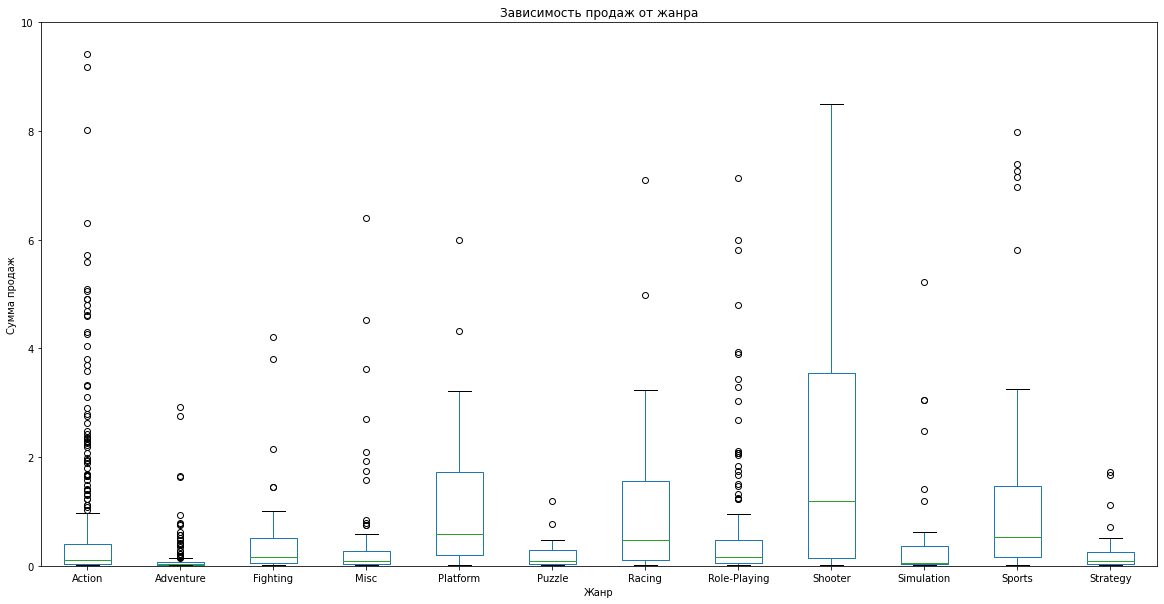

In [ ]:
# Построим график «ящик с усами»  в разбивке по жанрам за актуальный период
actual_period.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,10), figsize=(20, 10))
plt.title('Зависимость продаж от жанра')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show();

*** Вывод ***
Игры в выборке с 1980 по 2016, но для анализа можно взять лучшй период с 2013 по 2016, т.к за этот период появилось больше всего новых платформ и соотвтвенно продаж.
Лидерами по продажам являюся PS3, PS4, X360, XOne. Платформы, у которых есть шансы на 2017 год: XOne, PS4, 3DS, PS3, X360, Wii.
Продажи XOne, PS4, 3DS, PS3, X360, Wii платформ не сильно зависят от оценок критиков и от оценок игроков.
Действилельно, после нахождения среднего, медианного значения и построения боксплота рейтинг жанров немного поменялся.
Самые прибыльные жанраы: Стрелялки, гонки, платформенные игры и спорт, борьба. И никто не любит пазлы и приключения)


## Составим портрет пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

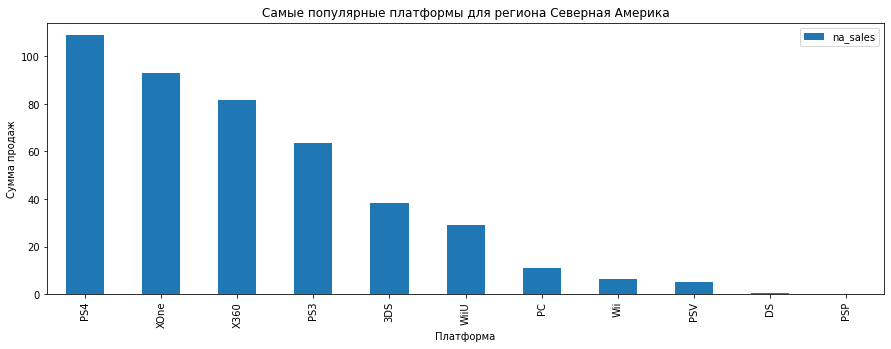

In [ ]:
actual_period.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Самые популярные платформы для региона Северная Америка')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show();

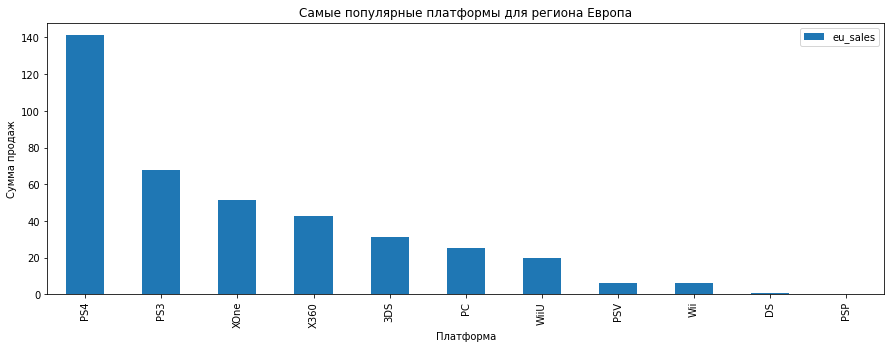

In [ ]:
actual_period.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Самые популярные платформы для региона Европа')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show();

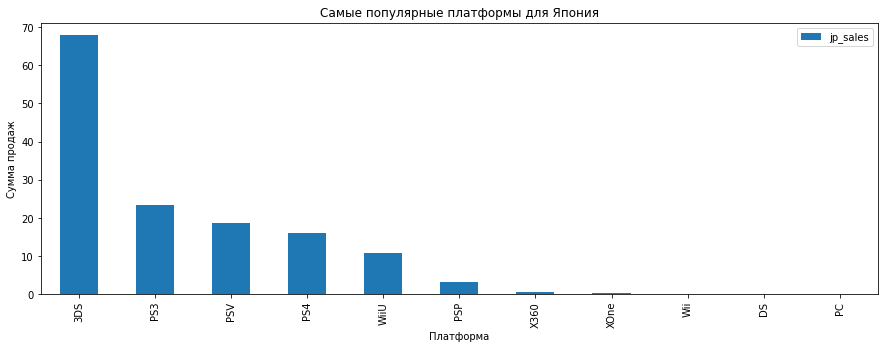

In [ ]:
actual_period.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Самые популярные платформы для Япония')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show();

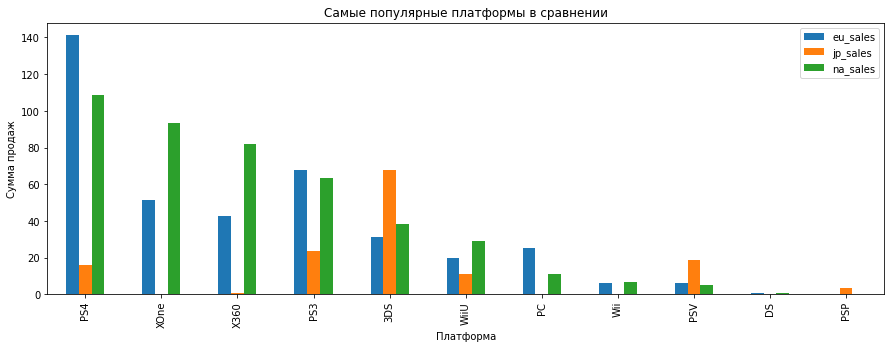

In [ ]:
actual_period.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(ascending=False, by = ['na_sales', 'eu_sales', 'jp_sales']).plot(kind = 'bar', figsize=(15,5))
plt.title('Самые популярные платформы в сравнении')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show();

По графикам видим, что в топ 5:

Топ 5 Северной Америки:  X360, PS3, PS4, XOne, 3DS

Топ 5 Европы:            PS4, XOne,  X360, PS3, 3DS

Топ 5 Японии:            3DS, PS3, PSV, PS4, WiiU

В топ 5 входят одни и теже платфоры, только с разными долями продаж. Больше всех играют в Северной Америке, на втором месте Европа, Япония играет меньше всех.

### Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

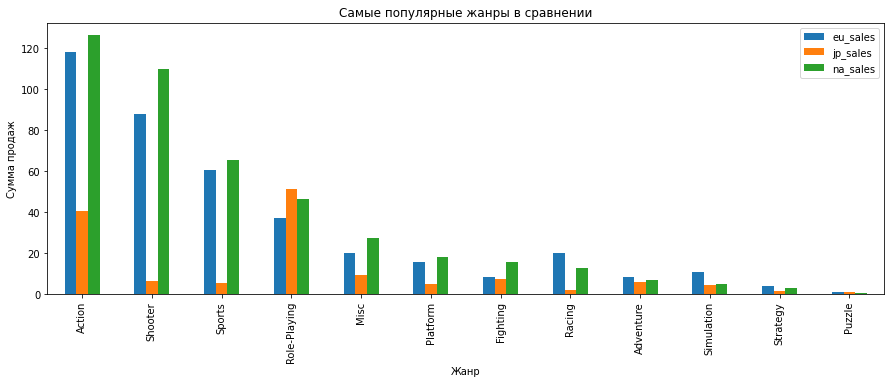

In [ ]:
actual_period.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(ascending=False, by = ['na_sales', 'eu_sales', 'jp_sales']).plot(kind = 'bar', figsize=(15,5))
plt.title('Самые популярные жанры в сравнении')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show();

По графикам видим, что в топ 5 по жанрам:

Топ 5 Северной Америки:  Аркады, Стрелялки, Спорт, Ролевые игры, Разносторонние игры

Топ 5 Европы:            Аркады, Стрелялки, Спорт, Ролевые игры, Разносторонние игры

Топ 5 Японии:           Ролевые игры, Аркады, Разносторонние игры, Стрелялки, Платформенные игры

В топ 5 по жанрам  Европы и Северной Америки входят одни и те же жанры. Япония отличается по своим предпочтениям в жанрах.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Мы уже считали общую сумму продаж без учета выбранного периода, посчитаем еще раз для периода и без остальных регионов

In [ ]:
actual_period['region_sales'] = actual_period['na_sales'] + actual_period['eu_sales'] + actual_period['jp_sales']

In [ ]:
# создадим сводную таблицу по рейтингу и отсортируем для наглядности
ESRB = actual_period.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').sort_values(ascending=False, by = ['na_sales', 'eu_sales', 'jp_sales'])
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
M,145.32,14.11,165.21
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
T,41.95,20.59,49.79


Рейтинг влияет на продажи по регионам

*** Вывод *** Пользователи Северной Америки и Европы играют  в одни и те же платформы и скорей всего дома на "стационарных приставках". Им соотвтетвуют и жанры для таких платформ.  А в Японии играют и на переносных пристаках, которые можно брать с собой, поэтому жанры отличаются. Рейтинг ESRB влияет на продажи по регионам

Проверим как продажи отличаются по рейтингам в зависимости от региона

In [ ]:
rating_sales = actual_period.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})

rating_sales

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79


В Америке и Европе продажи распределены идентично в зависимости от рейтингов: преобладают игры для взрослых, далее игры для всех, на третьем месте игры для подростков и замыкают игры для всех от 10 лет и страше.
В Японии  лидируют игры для всех, для подростков, для взрослых.

##  Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем гипотезы:

H_0: Средний пользовательский рейтинг платформы Xbox One = Среднему пользовательскому рейтингу платформ PC

H_1: Средний пользовательский рейтинг платформы Xbox One != Среднему пользовательскому рейтингу платформ PC

Зададим alpha = 0.05

In [ ]:
XboxOne = actual_period[(actual_period['platform'] == 'XOne') &  (actual_period['user_score'] > 0)]['user_score']
PC = actual_period[(actual_period['platform'] == 'PC') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XboxOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


Для того, чтобы понять какой тест выбрать для проверки гипотез мы можем предположить, что выборки имеют равные дисперсии, если отношение большей выборочной дисперсии к меньшей выборочной дисперсии составляет менее 4:1

In [ ]:
np.var(PC), np.var(XboxOne)

(3.016306347554631, 1.8965188383045526)

Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет 3.01 / 1.8965 = 1,58 , что меньше 4.
Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.

Таким образом, мы можем приступить к выполнению двухвыборочного t-критерия с равными дисперсиями:

У нас две выборки, проведем для них t тест

In [ ]:
#проверяем нулевую гипотезу

alpha = 0.05
results = st.ttest_ind(XboxOne, PC, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Поскольку p-значение нашего теста больше alpha, то у нас нет оснований отвергнуть нулевую гипотезу. А значит есть основания предполагать, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформ PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Средний пользовательский рейтинг жанра Action = Средний пользовательский рейтинг жанра Sports

H_1: Средний пользовательский рейтинг жанра Action != Средний пользовательский рейтинг жанра Sports

Зададим alpha = 0.05

In [ ]:
Action = actual_period[(actual_period['genre'] == 'Action') &  (actual_period['user_score'] > 0)]['user_score']
Sports = actual_period[(actual_period['genre'] == 'Sports') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


In [ ]:
np.var(Action), np.var(Sports)

(1.7648124186332366, 3.160733984375)

Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет 6,83 / 5,2 = 1,31 , что меньше 4.
Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.

Таким образом, мы можем приступить к выполнению двухвыборочного t-критерия с равными дисперсиями:

У нас две выборки, проведем для них t тест

In [ ]:
#проверяем нулевую гипотезу

alpha = 0.05
results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Поскольку p-значение нашего теста меньше alpha, шанс что нулевая гипотеза верна очень мал, поэтому отвергаем нулевую гипотезу и принимаем альтернативную.

### Общий вывод:

    После проведенного исследования можно сделать следующие выводы.
1.	В данных было отмечено большое количество пропусков, которые невозможно заменить, поскольку они могут соответствовать новым играм, которые еще не оценены. Поэтому решено оставить эти пропуски без изменений.
2.	Пропуски в полях с названием и жанром и годом выпуска были удалены, так как они не повлияли на итоговый анализ данных.
3.	Для удобства анализа было решено привести все имена  к нужному регистру.
4.	Поля Crit_score и Year_of_Release были приведены к целочисленному типу данных, поскольку они представлены как рейтинг и год.
5.	Для анализа были выбраны данные только после 2013 года, поскольку в этот период появилось больше новых платформ и соответствующих продаж.
6.	Было установлено, что лидерами по продажам игр являются платформы PS3, PS4, X360 и XOne. Платформы X360, PS3, PS4, XOne, 3DS могут добиться хороших успехов в 2017 году.
7.	Продажи игр не сильно, но зависят не только от оценок критиков, но и от оценок игроков.
8.	Среди жанров видеоигр наиболее популярными и перспективными можно выделить Action, Shooter, Sports и Role-Playing. Следует быть внимательными к жанру «Приключения», так как их продажа не очень высока.
9.	Большая часть игр не имеет рейтинга ESRB, что делает анализ данных неполными и неточными. Однако можно сказать, что игры для взрослых и игры для всех возрастов пользуются наибольшим спросом среди игроков из Европы и Северной Америки.
11.	В целом предпочтения пользователей из Европы и Северной Америки одинаковы, поэтому можно увеличить рекламные и маркетинговые усилия для этих регионов. А для успеха кампаний в Японии необходимы более детальные приготовления.

Из результатов исследования  можно сделать вывод, что жанры игр, платформы, отзывы критиков, пользователей и рейтинги ESRB являются необходимыми факторами, влияющими на успех и продажу игр, а также для успешной маркетинговой стратегии.
